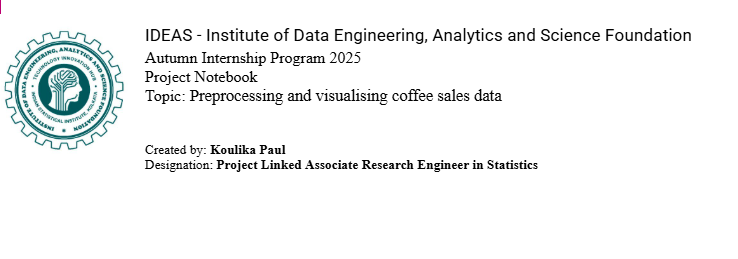

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7cfe5a3e9c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

**Q3. Find the maximum money for each month**

***Distribution of money over months***

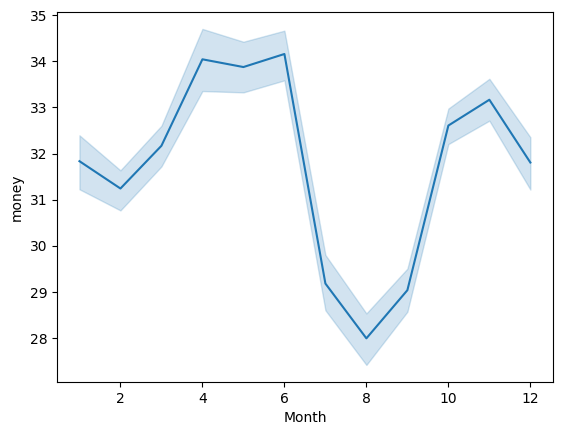

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

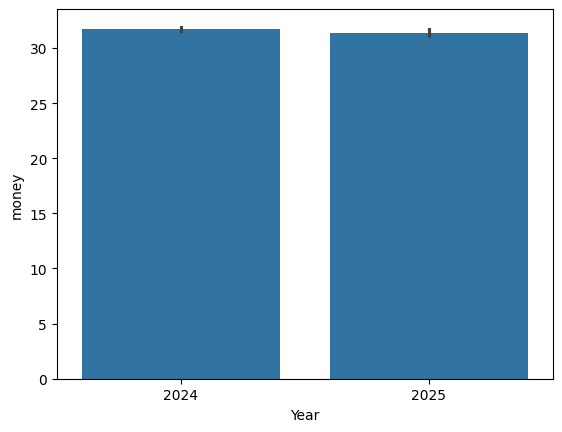

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
56,56.0
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,1.166936
1,2023-01-02,1.573639
2,2023-01-03,1.246487
3,2023-01-04,2.082552
4,2023-01-05,1.597629
...,...,...
95,2023-04-06,-9.013257
96,2023-04-07,-8.219102
97,2023-04-08,-8.810398
98,2023-04-09,-8.505690


**Q7. Insert synthetic data into the given data set and analyse as above.**